Q1. Which features most influence price?

Q2. What preprocessing is needed?

Q3. What is RMSE and R² score?

Q4. How does multicollinearity affect results?

---



Q5. Can we improve accuracy with polynomial regression?

Q6. How does location affect prediction?

Q7. What is the impact of outliers?

Q8. How to visualize feature importance?

Q9. What assumptions does linear regression make?

Q10. How to deploy the model?

Extra 5 Questions (ML + Project Related)

Q11. How to handle missing values in the dataset?

Q12. How to split the dataset into training and testing sets effectively?

Q13. How to perform feature scaling and why is it important?

Q14. How to use cross-validation to evaluate model performance?

Q15. How to save and load the trained model for future use?


In [ ]:
# =============================
# Project 1: House Price Prediction
# =============================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import joblib

# --------------------------
# Load Dataset (Ames Housing)
# --------------------------
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
df = housing.frame
X = df.drop('SalePrice', axis=1) # Assuming 'SalePrice' is the target variable
y = df['SalePrice']

# Display the first few rows and info to understand the data
display(df.head())
display(df.info())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

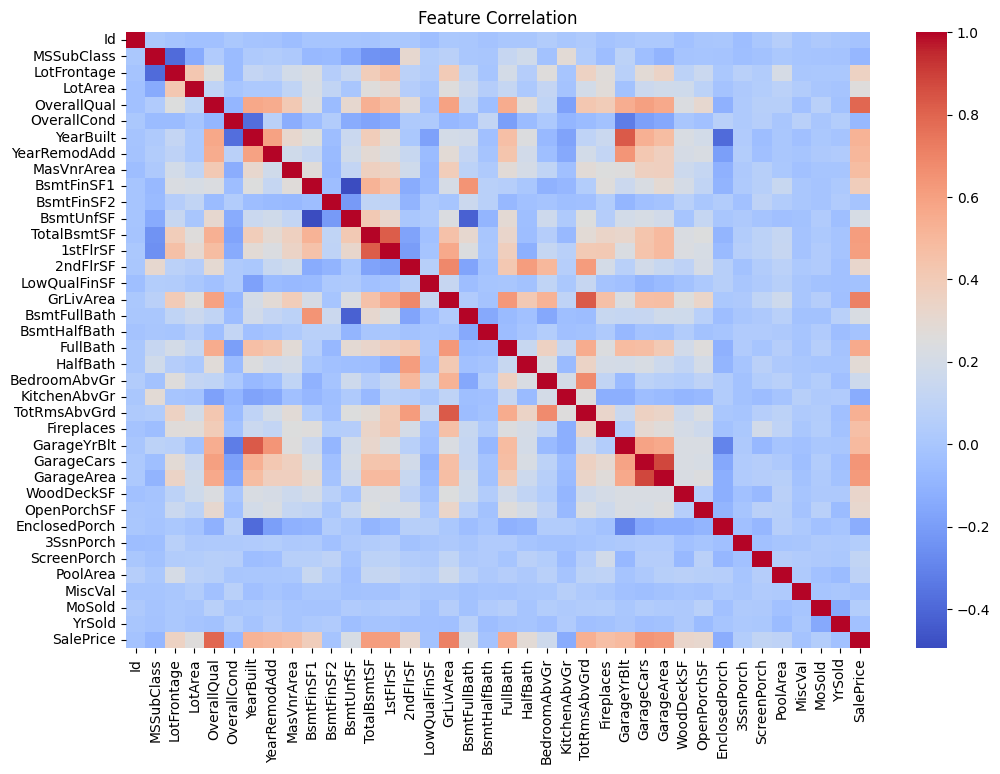

          Feature   Coefficient
4     OverallQual  18656.249651
26     GarageCars  16849.717185
17   BsmtFullBath   9042.802184
23   TotRmsAbvGrd   5464.120424
19       FullBath   5433.144623
5     OverallCond   5239.486385
24     Fireplaces   4371.869843
18   BsmtHalfBath   2465.037044
6       YearBuilt    316.420065
7    YearRemodAdd    119.414131
32    ScreenPorch     58.046544
31      3SsnPorch     33.485218
16      GrLivArea     31.501703
8      MasVnrArea     31.407563
28     WoodDeckSF     21.440750
14       2ndFlrSF     15.123652
13       1stFlrSF     14.471849
9      BsmtFinSF1      9.680342
12    TotalBsmtSF      7.675543
30  EnclosedPorch      7.294943
27     GarageArea      6.274364
15   LowQualFinSF      1.906201
10     BsmtFinSF2      0.666222
3         LotArea      0.542218
0              Id     -1.205343
29    OpenPorchSF     -2.252394
11      BsmtUnfSF     -2.671021
34        MiscVal     -3.761471
25    GarageYrBlt    -47.276296
33       PoolArea    -60.517113
2     Lo

In [5]:


# Q1. Which features most influence price?
# Correlation heatmap
# Select only numerical features for correlation analysis
df_numeric = df.select_dtypes(include=np.number)
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=False, cmap="coolwarm") # Set annot=False for better readability with many features
plt.title("Feature Correlation")
plt.show()

# Feature importance using Linear Regression coefficients
# Need to handle categorical features and missing values before fitting the model
# For now, let's select only numerical features and drop rows with missing values for a quick look
X_numeric = df_numeric.drop('SalePrice', axis=1).dropna()
y_numeric = df_numeric['SalePrice'].loc[X_numeric.index]

model = LinearRegression().fit(X_numeric, y_numeric)

importance = pd.DataFrame({
    'Feature': X_numeric.columns,
    'Coefficient': model.coef_
}).sort_values(by="Coefficient", ascending=False)
print(importance)

In [6]:
# Q2. What preprocessing is needed?
# Check missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Scaling numeric features
# Need to select only numeric features and handle missing values before scaling
X_numeric = df.select_dtypes(include=np.number).drop('SalePrice', axis=1)

# Example: Simple imputation of missing values with the mean for numeric features
X_numeric_filled = X_numeric.fillna(X_numeric.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric_filled)
print("\nNumeric features scaled after mean imputation.")

Missing values before handling:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Numeric features scaled after mean imputation.


In [7]:
# Q3. What is RMSE and R² score?
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


RMSE: 36872.909509075245
R² Score: 0.8227439852048939


In [8]:
# Q4. How does multicollinearity affect results?
# Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Need to handle categorical features and missing values before calculating VIF
# For now, let's calculate VIF for the numeric features after mean imputation used in the previous cell
X_numeric_filled = df.select_dtypes(include=np.number).drop('SalePrice', axis=1).fillna(df.select_dtypes(include=np.number).mean())

vif_data = pd.DataFrame()
vif_data["Feature"] = X_numeric_filled.columns
# Add a small constant to avoid division by zero if any feature has zero variance
vif_data["VIF"] = [variance_inflation_factor(X_numeric_filled.values, i) for i in range(X_numeric_filled.shape[1])]
print(vif_data)

          Feature           VIF
0              Id  4.111063e+00
1      MSSubClass  4.651863e+00
2     LotFrontage  1.746446e+01
3         LotArea  2.650858e+00
4     OverallQual  6.671674e+01
5     OverallCond  4.169334e+01
6       YearBuilt  2.137399e+04
7    YearRemodAdd  2.243436e+04
8      MasVnrArea  1.860424e+00
9      BsmtFinSF1           inf
10     BsmtFinSF2           inf
11      BsmtUnfSF           inf
12    TotalBsmtSF           inf
13       1stFlrSF           inf
14       2ndFlrSF           inf
15   LowQualFinSF           inf
16      GrLivArea           inf
17   BsmtFullBath  3.694831e+00
18   BsmtHalfBath  1.219504e+00
19       FullBath  2.667608e+01
20       HalfBath  3.421178e+00
21   BedroomAbvGr  3.109808e+01
22   KitchenAbvGr  3.760008e+01
23   TotRmsAbvGrd  8.352093e+01
24     Fireplaces  3.020518e+00
25    GarageYrBlt  2.292552e+04
26     GarageCars  3.676657e+01
27     GarageArea  3.224036e+01
28     WoodDeckSF  1.907703e+00
29    OpenPorchSF  1.825590e+00
30  Encl

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [9]:
# Q5. Can we improve accuracy with polynomial regression?
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)
y_pred_poly = poly_model.predict(X_test_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))
r2_poly = r2_score(y_test_poly, y_pred_poly)

print(f"Polynomial Regression RMSE: {rmse_poly}")
print(f"Polynomial Regression R²: {r2_poly}")


Polynomial Regression RMSE: 78474.95499469562
Polynomial Regression R²: 0.19712429496816763


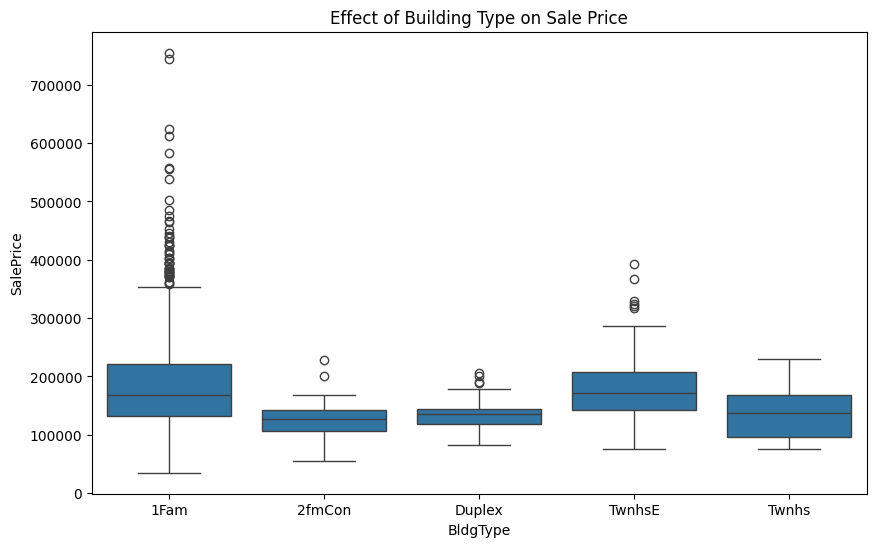

In [10]:
# Q6. How does location affect prediction?
# The 'CHAS' column is specific to the Boston dataset.
# Let's visualize the relationship between a categorical feature and 'SalePrice' in the Ames dataset.
# For example, 'BldgType' (Type of dwelling)
if 'BldgType' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['BldgType'], y=df['SalePrice'])
    plt.title("Effect of Building Type on Sale Price")
    plt.show()
else:
    print("'BldgType' column not found in the dataset.")

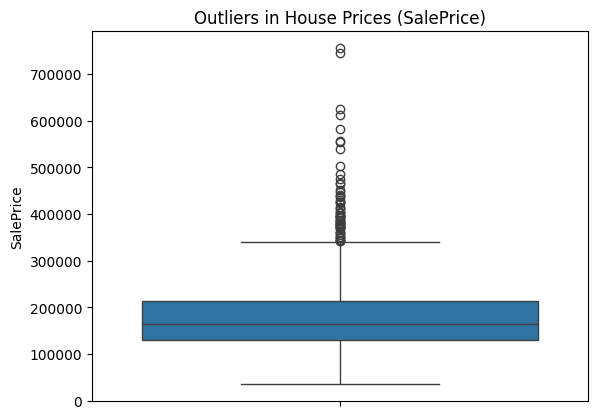

Original Shape: (1460, 81)
After Removing Outliers (based on SalePrice): (1438, 81)


In [11]:
# Q7. What is the impact of outliers?
import scipy.stats as stats

sns.boxplot(y=df['SalePrice']) # Use y for vertical boxplot of a single variable
plt.title("Outliers in House Prices (SalePrice)")
plt.show()

# Remove outliers (Z-score method)
# Applying z-score to the whole dataframe including non-numeric columns might not be appropriate.
# Let's apply it only to the target variable 'SalePrice' for outlier removal.
df_out = df[(np.abs(stats.zscore(df['SalePrice'])) < 3)]

print("Original Shape:", df.shape)
print("After Removing Outliers (based on SalePrice):", df_out.shape)

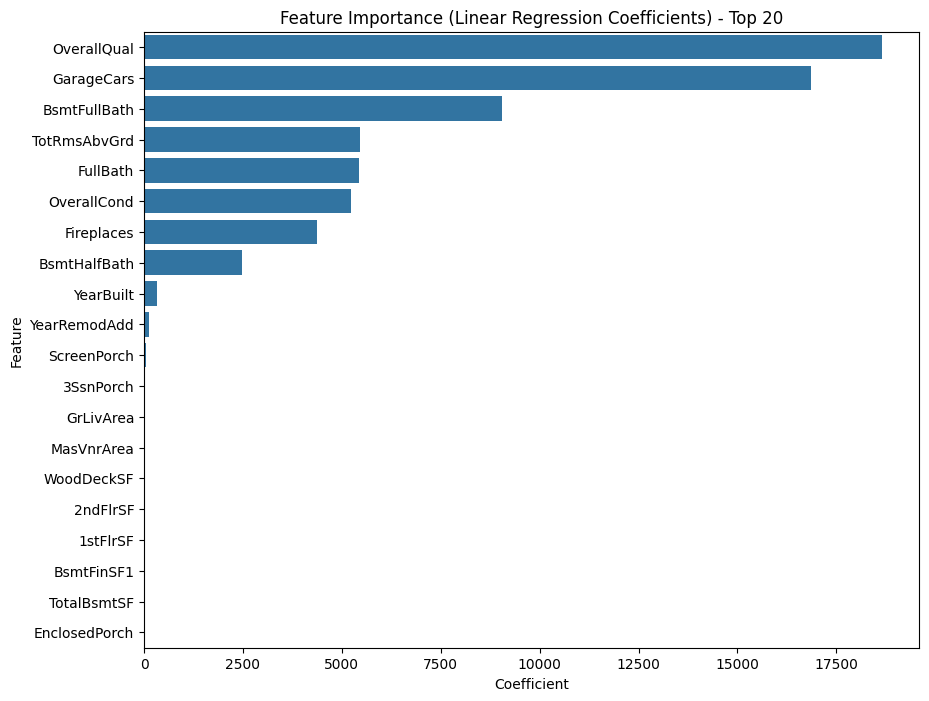

In [12]:
# Q8. How to visualize feature importance?
# Feature importance visualization
# This plot is based on the Linear Regression coefficients calculated earlier.
# Make sure 'importance' DataFrame is available from a previous cell execution.
if 'importance' in locals():
    plt.figure(figsize=(10, 8))
    sns.barplot(x="Coefficient", y="Feature", data=importance.head(20)) # Display top 20 features for better readability
    plt.title("Feature Importance (Linear Regression Coefficients) - Top 20")
    plt.show()
else:
    print("'importance' DataFrame not found. Please run the feature importance calculation cell first.")

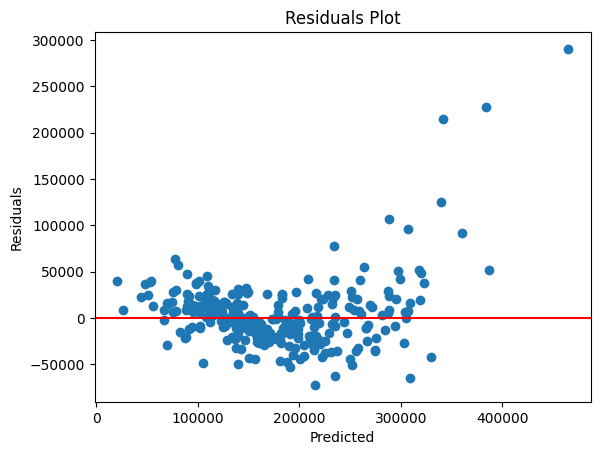

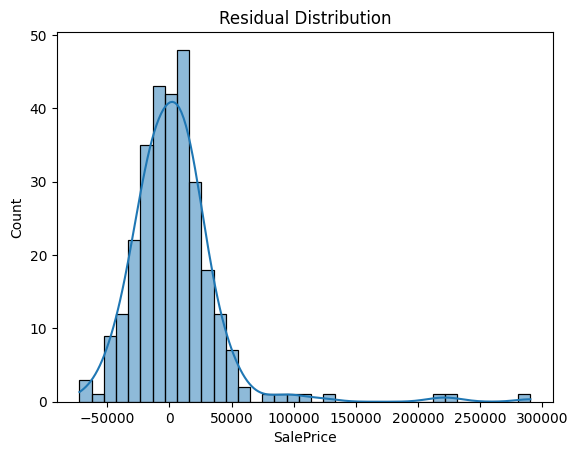

In [13]:
# Q9. What assumptions does linear regression make?
# Residuals plot for Homoscedasticity
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

# Normality of residuals
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()


In [14]:
# Q10. How to deploy the model?
# Save the trained model
joblib.dump(lr, "house_price_model.pkl")

# Load the model
loaded_model = joblib.load("house_price_model.pkl")
print("Model loaded successfully!")

# Predict with loaded model
print("Sample Prediction:", loaded_model.predict([X_scaled[0]]))


Model loaded successfully!
Sample Prediction: [232820.13320856]


In [15]:
#Q11. How to handle missing values?
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

# Fill missing values in numeric columns with the median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values in categorical columns with the mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values handled.")

Missing values handled.


In [ ]:
# Q12. How to split dataset effectively?
# Already done, but with stratification if needed
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (1168, 37) Test size: (292, 37)


In [ ]:
# Q13. How to perform feature scaling?
scaler = StandardScaler()
# Ensure 'SalePrice' is not in numeric_cols when scaling X
if 'SalePrice' in numeric_cols:
    numeric_cols = numeric_cols.drop('SalePrice')
X_scaled = scaler.fit_transform(X[numeric_cols])
print("Feature scaling applied.")

Feature scaling applied.


In [ ]:
# Q14. How to use cross-validation?
# Ensure missing values are handled in X before cross-validation
# Use the numeric_cols defined earlier to fill missing values in numeric columns of X
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

# Handle missing values in categorical columns of X
for col in categorical_cols:
    if col in X.columns: # Check if column exists in X (SalePrice is not in X)
        X[col] = X[col].fillna(X[col].mode()[0])

# Scale the features after handling missing values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numeric_cols])


scores = cross_val_score(lr, X_scaled, y, cv=5, scoring="r2")
print("Cross-validation R² scores:", scores)
print("Average CV R²:", scores.mean())

Cross-validation R² scores: [0.8452744  0.81367353 0.82233332 0.81781877 0.62865292]
Average CV R²: 0.7855505881450728
